# Bài tập SVM

Nguyễn Trường Thành
2270084

## Sử dụng SVC để phân nhóm cho tập Iris dataset
- dataset: 'Iris.csv'


In [40]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('Iris.csv')

## 1) Phân tích dữ liệu

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df = df.drop(labels=['Id'], axis=1)
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
df.shape

(150, 5)

In [11]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
df[df['Species'] == 'Iris-setosa'].shape

(50, 5)

In [13]:
df[df['Species'] == 'Iris-versicolor'].shape

(50, 5)

In [14]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of Iris-setosa: {}".format(df[df.Species == 'Iris-setosa'].shape[0]))
print("Number of Iris-versicolor: {}".format(df[df.Species == 'Iris-versicolor'].shape[0]))
print("Number of Iris-virginica: {}".format(df[df.Species == 'Iris-virginica'].shape[0]))

Total number of Species: 150
Number of Iris-setosa: 50
Number of Iris-versicolor: 50
Number of Iris-virginica: 50


Thus we can see there are equal number of Iris-setosa, Iris-versicolor and Iris-virginica labels

In [15]:
df.shape

(150, 5)

## 2) Biển đổi dữ liệu

### Xác định `features` và `labels`

In [16]:
X=df.iloc[:, :-1]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Data Encoding

No need to do

In [20]:
y=df.iloc[:,-1]


In [22]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [23]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### Data Standardization


In [17]:
X.shape

(150, 4)

In [18]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### Splitting dataset into training set and testing set for better generalisation

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 3)  Sử dụng mô hình Support Vector Machine
- Chúng ta sẽ sử dụng Support Vector Classifier(SVC) của thư viện `sklearn` với các `kernel` khác nhau

#### Default kernel (=> kernel='rbf')

In [24]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters

In [25]:
svc

SVC()

- ==>  kernel='rbf' is the default

In [26]:
svc.fit(X_train,y_train)


SVC()

In [27]:
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9666666666666667


#### Linear kernel

In [28]:
svc=SVC(kernel='linear')


In [29]:
svc

SVC(kernel='linear')

In [30]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9666666666666667


#### Polynomial kernel

In [31]:
svc=SVC(kernel='poly')


In [32]:
svc

SVC(kernel='poly')

In [33]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
1.0


## 4) K-fold cross validation with different kernels

### a) CV on Linear kernel

In [34]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
svc

SVC(kernel='linear')

 - ==> C = 1.0

In [35]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1.         0.93333333 1.         1.         0.86666667 1.
 0.86666667 1.         1.         1.        ]


In [36]:
print(scores.mean())

0.9666666666666668


In K-fold cross validation we generally take the mean of all the scores.

#### Thay đổi giá trị `C`

- C is a parameter of the SVC learner and is the penalty for misclassifying a data point.
- When C is small, the classifier is okay with misclassified data points (high bias, low variance) => cause underfitting . 
- When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points (low bias, high variance) => cause overfitting .

- ==> Thus the value of C must be chosen in such a manner that it generalised the unseen data well**

In [42]:
C_range=list(range(1,40))
acc_score=[]

In [43]:
print(C_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [44]:
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.9666666666666668, 0.9600000000000002, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9600000000000002, 0.9600000000000002, 0.9600000000000002, 0.9600000000000002, 0.9733333333333334, 0.9666666666666668, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001]


Text(0, 0.5, 'Cross-Validated Accuracy')

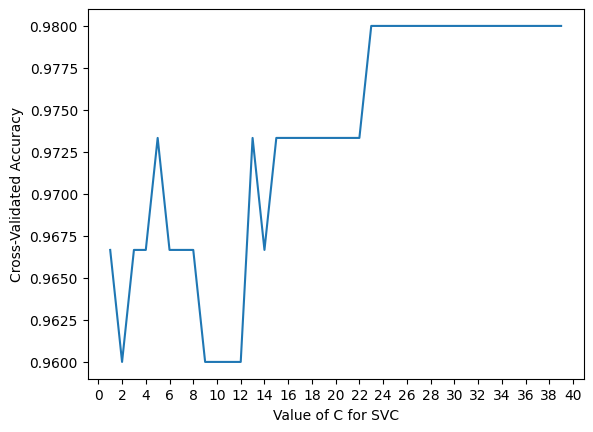

In [45]:
import matplotlib.pyplot as plt

C_values=list(range(1,40))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,41,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

=> Ta sẽ kiểm tra từ giá trị C=23 trở đi vì đoạn đó cho độ chính xác cao nhất

In [46]:
C_range=list(np.arange(23.1,26,0.1))
acc_score=[]

In [47]:
C_range

[23.1,
 23.200000000000003,
 23.300000000000004,
 23.400000000000006,
 23.500000000000007,
 23.60000000000001,
 23.70000000000001,
 23.80000000000001,
 23.900000000000013,
 24.000000000000014,
 24.100000000000016,
 24.200000000000017,
 24.30000000000002,
 24.40000000000002,
 24.50000000000002,
 24.600000000000023,
 24.700000000000024,
 24.800000000000026,
 24.900000000000027,
 25.00000000000003,
 25.10000000000003,
 25.20000000000003,
 25.300000000000033,
 25.400000000000034,
 25.500000000000036,
 25.600000000000037,
 25.70000000000004,
 25.80000000000004,
 25.90000000000004]

In [48]:
C_range=list(np.arange(23.1,26,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001]


Text(0, 0.5, 'Cross-Validated Accuracy')

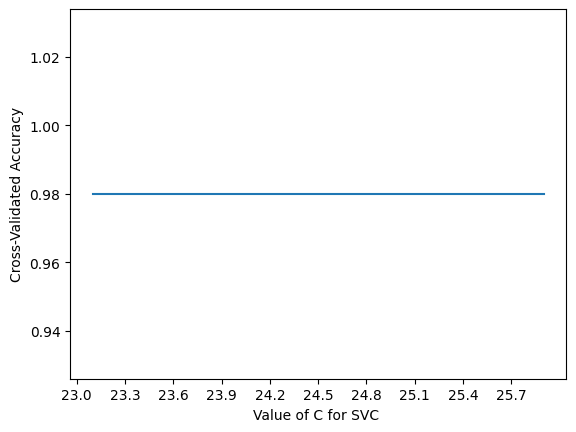

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(23.1,26,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(23,26,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

- ==> Độ chính xác cao nhất khi `C=23`

### b) CV on rbf kernel

In [51]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
svc

SVC()

In [52]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1.         0.93333333 1.         0.93333333 1.         0.93333333
 0.86666667 1.         1.         1.        ]


In [53]:
print(scores.mean())

0.9666666666666666


#### Thay đổi giá trị `gamma`
- gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore the decision region. - When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad.
- When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points

In [70]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.8600000000000001, 0.8600000000000001, 0.8933333333333333, 0.9800000000000001, 0.9533333333333334, 0.9133333333333333, 0.5066666666666666]


Text(0, 0.5, 'Cross-Validated Accuracy')

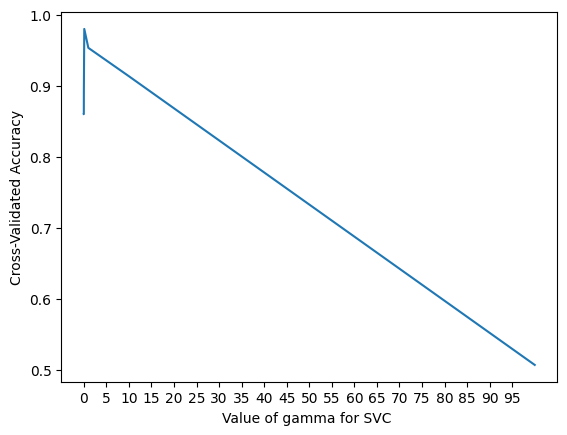

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

- ==> Ta thấy `gamma = 10` trở lên độ chính xác giảm, do đó ta sẽ tìm `gamma` cho độ chính xác cao nhất trong khoảng (0, 5)

In [82]:
gamma_range=[0.0001,0.001,0.01,2,3,4,5]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.8600000000000001, 0.8600000000000001, 0.8933333333333333, 0.9466666666666667, 0.9466666666666667, 0.9400000000000001, 0.9333333333333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

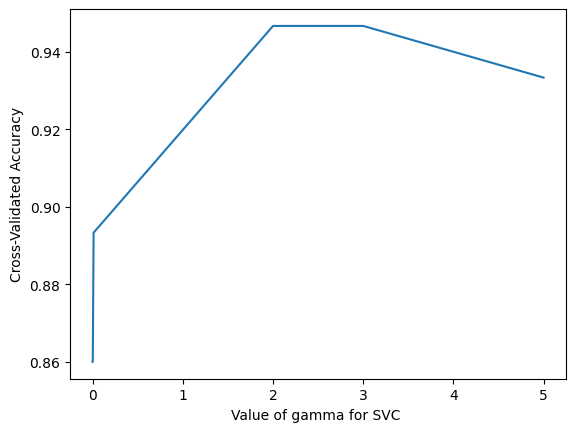

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,2,3,4,5]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

- => Ta sẽ xét trên đoạn gamma = 2 trở đi

In [84]:
gamma_range=[2, 2.0001, 2.0002, 2.001, 2.002, 2.01, 2.02, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667]


Text(0, 0.5, 'Cross-Validated Accuracy')

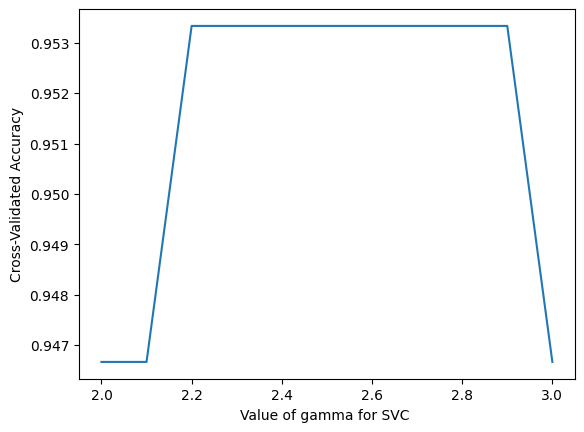

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[2, 2.0001, 2.0002, 2.001, 2.002, 2.01, 2.02, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

Ta xét rõ đoạn 2.1 đến 2.3

In [86]:
gamma_range=[2.01, 2.1, 2.1001, 2.1002, 2.1008, 2.1009, 2.199, 2.2, 2.21]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

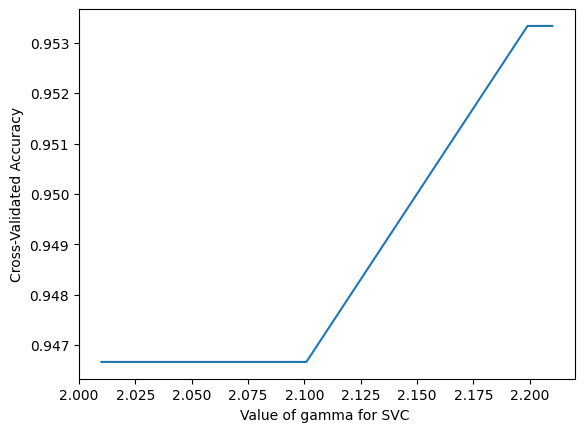

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[2.01, 2.1, 2.1001, 2.1002, 2.1008, 2.1009, 2.199, 2.2, 2.21]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

- Choose `gamma = 2.2` vì đây là giá trị max

#### Xây dựng model với `gamma = 2.2`

In [88]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf', gamma = 2.2)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1.         1.         1.         0.93333333 0.86666667 1.
 0.8        1.         0.93333333 1.        ]


In [89]:
print(scores.mean())

0.9533333333333334


### c) CV on Polynomial kernel

In [90]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
svc

SVC(kernel='poly')

In [91]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1.         0.93333333 1.         1.         0.93333333 0.86666667
 0.86666667 0.86666667 1.         0.93333333]


In [92]:
print(scores.mean())

0.9400000000000001


#### Taking polynomial kernel with different degree

In [94]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   

[0.8733333333333334, 0.9400000000000001, 0.8133333333333335, 0.8666666666666668, 0.7933333333333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

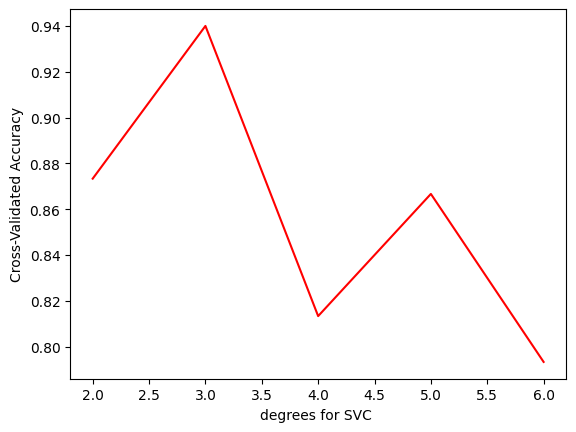

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

- => Nhận xét: độ chính xác cao tạo degree = 3, sau đó giảm dần. Do đó ta có thể thấy khi `degree` tăng, mô hình càng phức tạp. càng dễ dẫn đến hiện tượng overfitting


## 5) Sử dụng 'RandomizedSearchCV`
- Tất cả các bước trên có thể đơn giản hóa bằng cách dùng `GridSearchCV` hoặc `RandomizedSearchCV`

In [96]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


kernel_options = ['linear', 'poly', 'rbf']
C_options =  np.arange(1, 10, 0.001).tolist()
gamma_options =  np.arange(1, 10, 0.001).tolist()

param_grid = dict(kernel = kernel_options, C = C_options, gamma = gamma_options)

start_time = time.time()
clf = SVC()

#param_grid : grid của các thông số cần thay đổi
random = RandomizedSearchCV(estimator = clf, param_distributions = param_grid, cv = 10, scoring = 'accuracy')
random


RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [1.0, 1.001, 1.0019999999999998,
                                              1.0029999999999997,
                                              1.0039999999999996,
                                              1.0049999999999994,
                                              1.0059999999999993,
                                              1.0069999999999992,
                                              1.0079999999999991,
                                              1.008999999999999,
                                              1.009999999999999,
                                              1.0109999999999988,
                                              1.0119999999999987,
                                              1.0129999999999986,
                                              1.0139999999999985,
                                              1.0149999999999983,
                                              1.0159999...
                                                  1.0139999999999985,
                                                  1.0149999999999983,
                                                  1.0159999999999982,
                                                  1.0169999999999981,
                                                  1.017999999999998,
                                                  1.018999999999998,
                                                  1.0199999999999978,
                                                  1.0209999999999977,
                                                  1.0219999999999976,
                                                  1.0229999999999975,
                                                  1.0239999999999974,
                                                  1.0249999999999972,
                                                  1.0259999999999971,
                                                  1.026999999999997,
                                                  1.027999999999997,
                                                  1.0289999999999968, ...],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   scoring='accuracy')

In [97]:
clf.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [98]:
start_time = time.time()
random_result = random.fit(X, y)
print("Best: %f using %s" % (random.best_score_, random.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.966667 using {'kernel': 'linear', 'gamma': 4.298999999999637, 'C': 6.17199999999943}
Execution time: 0.3177659511566162 ms


In [99]:
best_clf = random.best_estimator_ 

In [100]:
random.best_params_

{'kernel': 'linear', 'gamma': 4.298999999999637, 'C': 6.17199999999943}

In [101]:
random.best_score_

0.9666666666666668

##### Sử dụng mô hình tốt nhất để dự đoán kết quả cuối cùng
- Độ chính xác này khác với `random.best_score_`

In [102]:
best_clf.score(X_test, y_test)

0.9666666666666667